# Vector Plots B,Bx,By,Bz
Data from OMNIData Web

In [53]:
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import matplotlib 
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn')


In [50]:
data= np.loadtxt('omm.txt')
size= np.shape(data)
df = pd.read_csv("omm.txt",
                 delim_whitespace=True,
                 usecols=[0, 1, 2,3, 4, 5, 6, 7, 8, 9],
                 names=["Year", "DOY", "Hour", "B", "Bx", "By","Bz","Pd","Kp","Sp"])


In [51]:
#Change time 
df.index = pd.to_datetime(df["Year"] * 100000 + df["DOY"] * 100 + df["Hour"], format="%Y%j%H")
df = df.drop(columns=["Year", "DOY", "Hour"])
df.head()

,B,Bx,By,Bz,Pd,Kp,Sp
2017-09-01 00:00:00,3.7,-0.8,-2.3,-1.9,3.4,33,59
2017-09-01 01:00:00,4.0,-1.1,-1.5,-2.6,3.4,33,59
2017-09-01 02:00:00,5.1,-4.6,-1.3,-0.2,2.6,33,59
2017-09-01 03:00:00,6.1,-5.4,-0.2,1.0,3.3,33,59
2017-09-01 04:00:00,7.7,-6.6,3.1,1.6,3.5,33,59


## Plotting a Vector Plot

<Figure size 1080x1080 with 0 Axes>

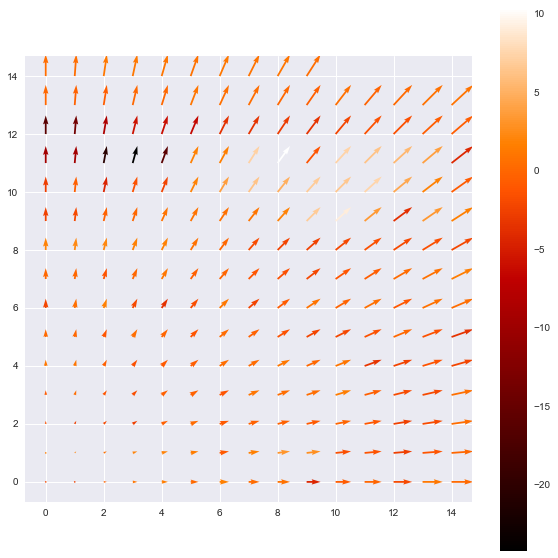

In [52]:
#plt.scatter(df.index,Bx,color='c')
df2= df.head(225)

#Adjusting grid size
x = np.arange(0,15,1)
y = np.arange(0,15,1)
X,Y = np.meshgrid(x,y)
plt.figure(figsize=(15,15))

#Plotting a vector/quiver plot
fig,ax = plt.subplots(figsize=(10,10))
CS1=ax.quiver(X,Y,df2.Bz,cmap='gist_heat')

ax.set_aspect('equal')
plt.colorbar(CS1, orientation= 'vertical')
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 

# plt.show

# Generating Subplots

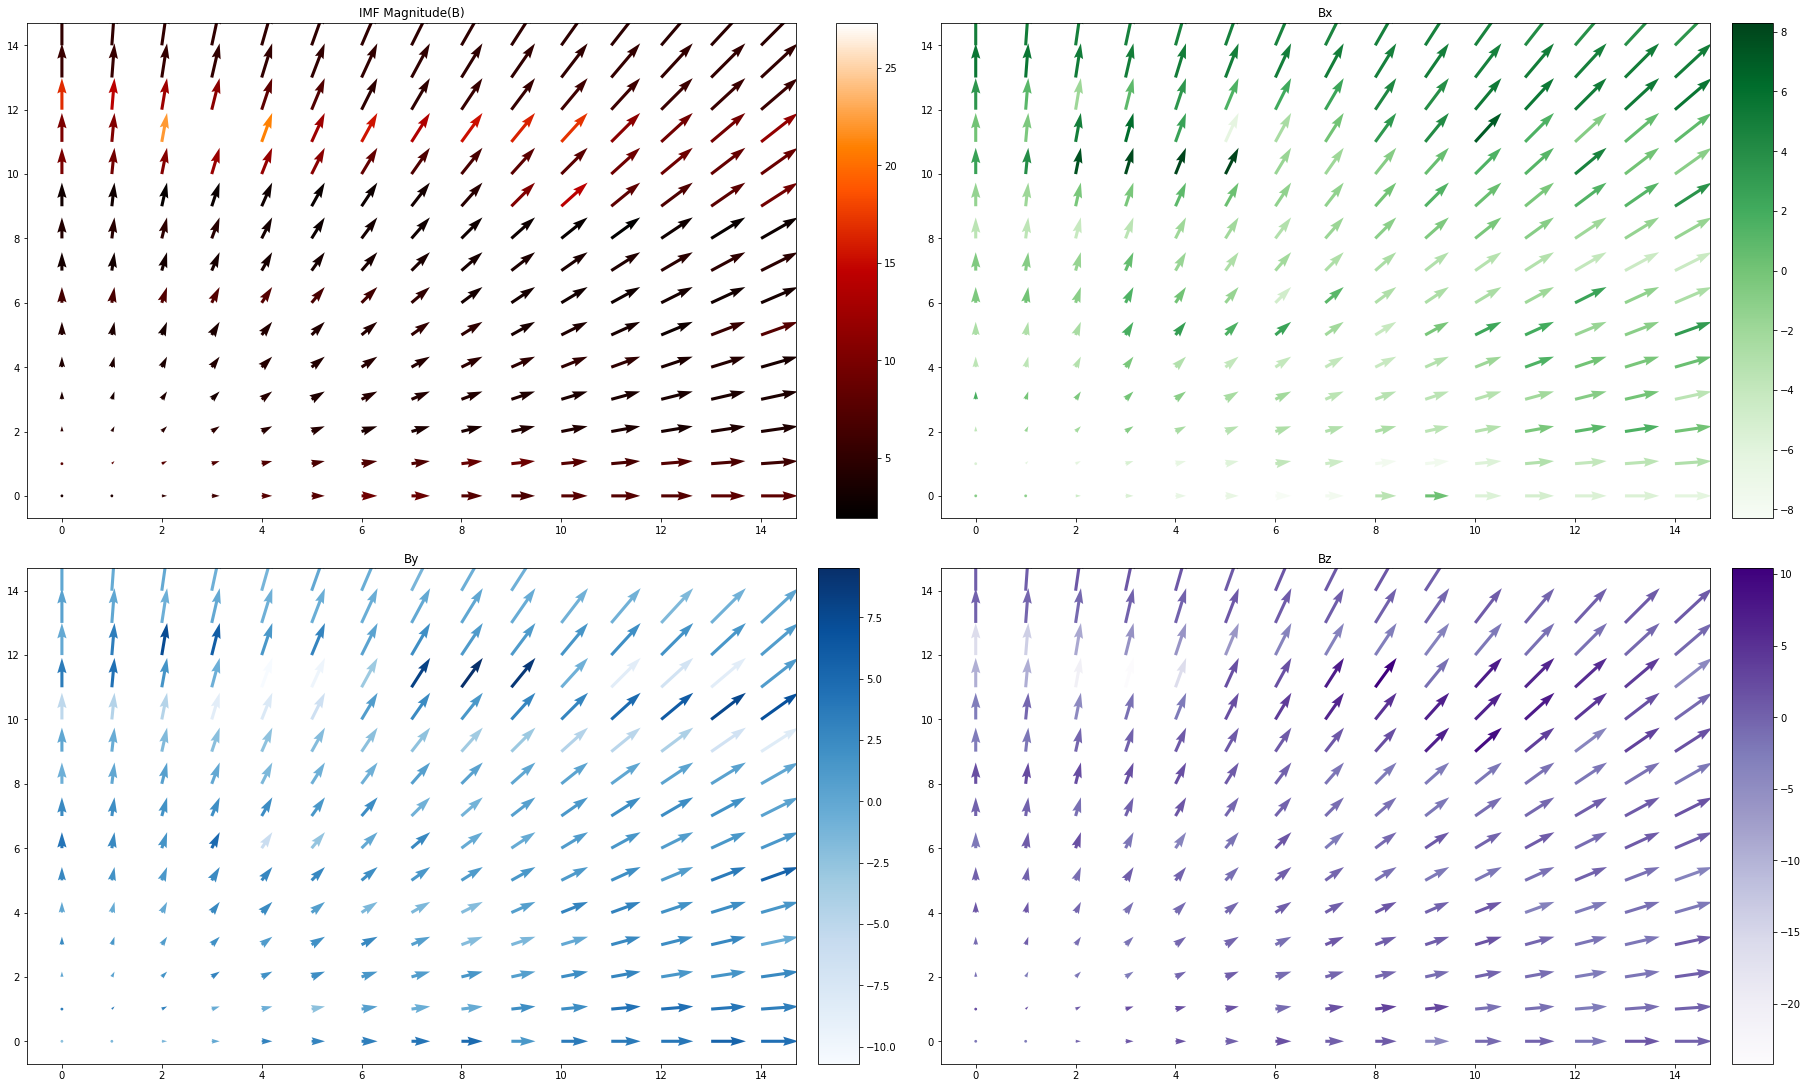

In [47]:
#Plotting the vector plots for each parameters
fig,(axs) = plt.subplots(2,2,figsize=(25,15),constrained_layout=True)
a=axs[0,0].quiver(X,Y,df2.B,cmap='gist_heat')
b=axs[0,1].quiver(X,Y,df2.Bx,cmap='Greens')
c=axs[1,0].quiver(X,Y,df2.By,cmap='Blues')
d=axs[1,1].quiver(X,Y,df2.Bz,cmap='Purples')

#Adding color bar to each subplot
fig.colorbar(a,ax=axs[0,0])
fig.colorbar(b,ax=axs[0,1])
fig.colorbar(c,ax=axs[1,0])
fig.colorbar(d,ax=axs[1,1])

#Adding Title to each subplot
axs[0,0].title.set_text('IMF Magnitude(B)')
axs[0,1].title.set_text('Bx')
axs[1,0].title.set_text('By')
axs[1,1].title.set_text('Bz')


